In [1]:
import sys
sys.path.append('/Users/JIC115/Desktop/HEseg_prj/hovernet_modeling/final_v2/')

from hv_util.util_train_prep import *

In [3]:
rt = Path('/Users/JIC115/Desktop/HEseg_prj/HNSCC_PDO_model/data3')
type_path = '/Users/JIC115/Desktop/HEseg_prj/hovernet_modeling/final_v2/hv_util/type_info_6chl.json'
celltypes = ['normal','tumor'] 
pd.set_option('display.max_rows', None)

## 1. Select tumor or normal regions on svs file -> 2. generate training tiles (genTilesFromAnns.groove) -> 3. run pred -> 4. json2gson

In [ ]:
# convert json to gson
wd = rt.joinpath('qprj_train_PDO_large_tile')
indir  = wd.joinpath('train_normal_json_ori')
outdir = wd.joinpath('train_normal_gson_ori')
json2gson(outdir,type_path,indir)

# rm ann splited by tile edge
gs_indir = wd.joinpath('train_normal_gson_ori')
outdir   = wd.joinpath('train_normal_gson_rmEdgeAnn')
rmBorderAnn(outdir,gs_indir,wsi_space=False,dist=1,tile_size=256)

In [ ]:
# convert json to gson
indir  = wd.joinpath('train_tumor_json_ori')
outdir = wd.joinpath('train_tumor_gson_ori') 
json2gson(outdir,type_path,indir)

# rm ann splited by tile edge
gs_indir = wd.joinpath('train_tumor_gson_ori')
outdir   = wd.joinpath('train_tumor_gson_rmEdgeAnn')
rmBorderAnn(outdir,gs_indir,wsi_space=False,dist=1,tile_size=256)

## 3. Refine annotions in qupath  ->  modify tile images 

In [19]:
imdir  = wd.joinpath('train_normal_im_ori')
gsdir1 = wd.joinpath('train_normal_gson_ori')
gsdir2 = rt.joinpath('qprj_HQ_normal/train_normal_gson_final')
shape  = (256,256)
outdir = rt.joinpath('qprj_HQ_normal/train_normal_im_final')

modify_image(outdir,imdir, gsdir1, gsdir2, shape = shape)

# count cells
count_outdir = rt.joinpath('qprj_HQ_normal')
df = count_cell_gson(count_outdir,gsdir2,celltypes)
df.sum()

normal    2423
tumor        0
dtype: int64

In [20]:
imdir  = wd.joinpath('train_tumor_im_ori')
gsdir1 = wd.joinpath('train_tumor_gson_ori')
gsdir2 = rt.joinpath('qprj_HQ_tumor/train_tumor_gson_final')
shape  = (256,256)
outdir = rt.joinpath('qprj_HQ_tumor/train_tumor_im_final')

modify_image(outdir,imdir, gsdir1, gsdir2, shape = shape)

# count cells
count_outdir = rt.joinpath('qprj_HQ_tumor')
df = count_cell_gson(count_outdir,gsdir2,celltypes)
df.sum()

normal       0
tumor     1221
dtype: int64

### 4. Generate training patch for hovernet with refined img and gson

(256, 256, 5)
[ 0  1  2  3  4  5  6  7  8  9 10]
[0 2]


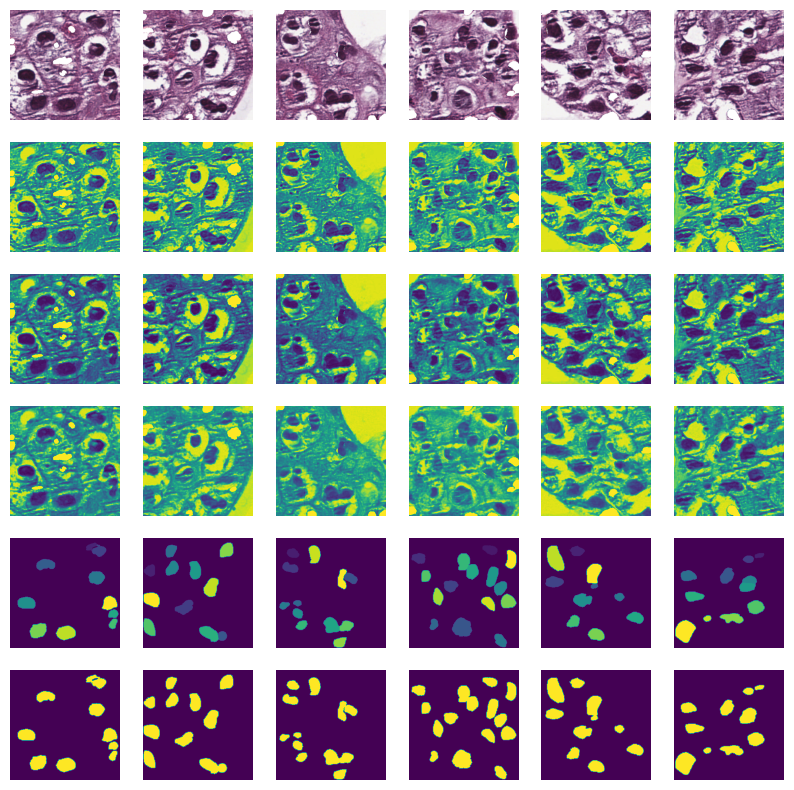

In [17]:
celltype = 'tumor'

im_indir = rt.joinpath('qprj_HQ_tumor/train_tumor_im_final')
gs_indir = rt.joinpath('qprj_HQ_tumor/train_tumor_gson_final')
outdir   = rt.joinpath('qprj_HQ_tumor/hv_patch')
shape = (256,256)

gen_hvPatch(outdir,im_indir,gs_indir,shape,celltype,celltypes,resize = False,dshape = shape)

# verify patches
check_hvPatch(im_indir,outdir)

(256, 256, 5)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0 1]


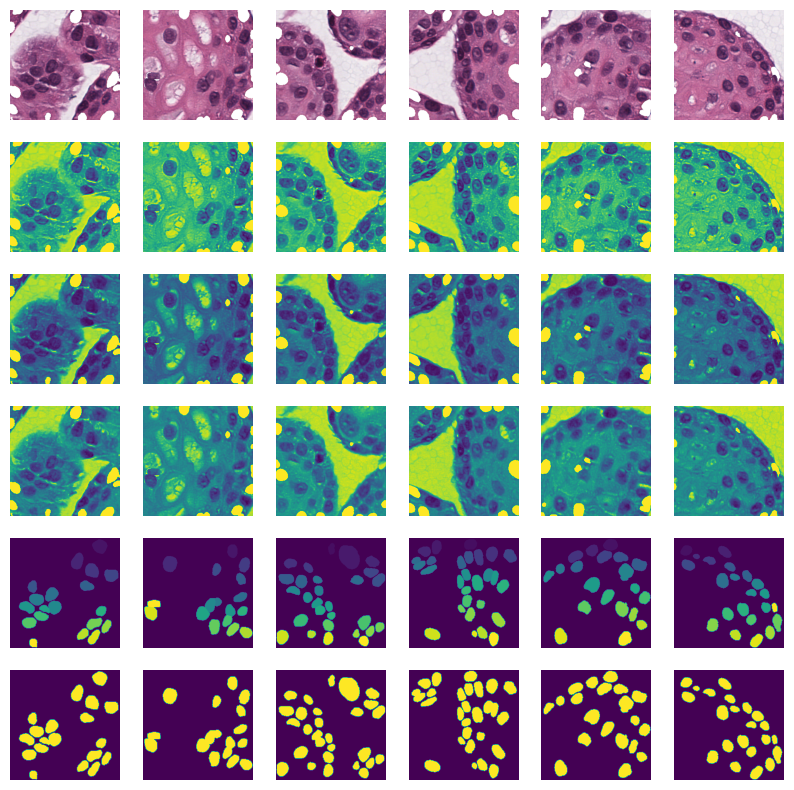

In [18]:
celltype = 'normal'

im_indir = rt.joinpath('qprj_HQ_normal/train_normal_im_final')
gs_indir = rt.joinpath('qprj_HQ_normal/train_normal_gson_final')
outdir   = rt.joinpath('qprj_HQ_normal/hv_patch')
shape = (256,256)

gen_hvPatch(outdir,im_indir,gs_indir,shape,celltype,celltypes,resize = False,dshape = shape)

# verify patches
check_hvPatch(im_indir,outdir)

### Split data for tumor 

In [23]:
# train set
indir   = rt.joinpath('qprj_HQ_tumor/hv_patch')
outdir  = rt.joinpath('qprj_HQ_tumor/hv_patch_train')
copy_move_files(outdir,indir,copy=False,ds_pct = 0.8)

# test_set
indir.rename(indir.parent.joinpath('hv_patch_val'))

70
copied 56 files,job done!


PosixPath('/Users/JIC115/Desktop/HEseg_prj/HNSCC_PDO_model/data3/qprj_HQ_tumor/hv_patch_val')

In [3]:
# count cells in train 
indir = rt.joinpath('qprj_HQ_tumor/hv_patch_train')
count_cell_patch(indir,celltypes)

{'background': 0, 'normal': 0, 'tumor': 948}

### Split data for normal 

In [7]:
# train set
indir   = rt.joinpath('qprj_HQ_normal/hv_patch')
outdir  = rt.joinpath('qprj_HQ_normal/hv_patch_train')
copy_move_files(outdir,indir,copy=False,ds_pct = 0.4)

# test_set
indir.rename(indir.parent.joinpath('hv_patch_val'))

130
copied 52 files,job done!


PosixPath('/Users/JIC115/Desktop/HEseg_prj/HNSCC_PDO_model/data3/qprj_HQ_normal/hv_patch_val')

In [8]:
# count cells in train 
celltypes = ['background','normal','tumor'] 
indir = rt.joinpath('qprj_HQ_normal/hv_patch_train')
count_cell_patch(indir,celltypes)

{'background': 0, 'normal': 1037, 'tumor': 0}

## Add more tumor to previous data

In [4]:
wd = rt.joinpath('qprj_train_PDO_large_tile')

In [8]:
# convert json to gson
indir  = wd.joinpath('train_tumor2_json_ori')
outdir = wd.joinpath('train_tumor2_gson_ori')
json2gson(outdir,type_path,indir)

# rm ann splited by tile edge
gs_indir = wd.joinpath('train_tumor2_gson_ori')
outdir   = wd.joinpath('train_tumor2_gson_rmEdgeAnn')
rmBorderAnn(outdir,gs_indir,wsi_space=False,dist=1,tile_size=256)

In [11]:
imdir  = wd.joinpath('train_tumor2_im_ori')
gsdir1 = wd.joinpath('train_tumor2_gson_ori')
gsdir2 = rt.joinpath('qprj_HQ_tumor2/train_tumor2_gson_final')
shape  = (256,256)
outdir = rt.joinpath('qprj_HQ_tumor2/train_tumor2_im_final')

modify_image(outdir,imdir, gsdir1, gsdir2, shape = shape)

# count cells
count_outdir = rt.joinpath('qprj_HQ_tumor2')
df = count_cell_gson(count_outdir,gsdir2,celltypes)
df.sum()

background      0
normal          0
tumor         692
dtype: int64

(256, 256, 5)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[0 2]


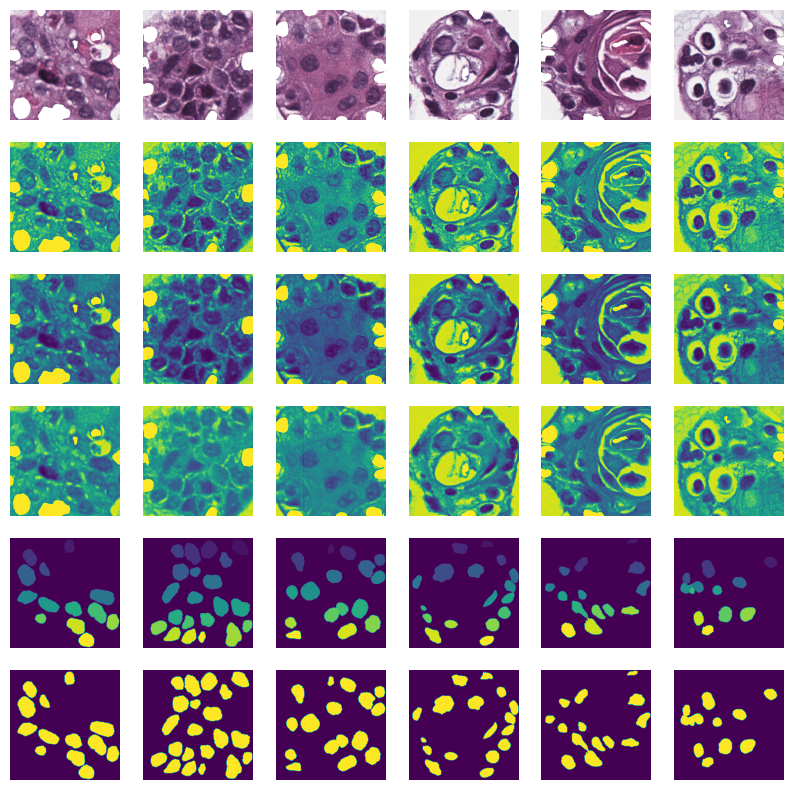

In [19]:
celltype = 'tumor'

im_indir = rt.joinpath('qprj_HQ_tumor2/train_tumor2_im_final')
gs_indir = rt.joinpath('qprj_HQ_tumor2/train_tumor2_gson_final')
outdir   = rt.joinpath('qprj_HQ_tumor2/hv_patch')
shape = (256,256)

gen_hvPatch(outdir,im_indir,gs_indir,shape,celltype,celltypes,resize = False,dshape = shape)

# verify patches
check_hvPatch(im_indir,outdir)

### add those new data to qprj_HQ_tumor

## Split dataset

In [23]:
# train set
indir   = rt.joinpath('qprj_HQ_tumor/hv_patch')
outdir  = rt.joinpath('qprj_HQ_tumor/hv_patch_train')
copy_move_files(outdir,indir,copy=False,ds_pct = 0.8)

# test_set
indir.rename(indir.parent.joinpath('hv_patch_val'))

110
copied 88 files,job done!


PosixPath('/Users/JIC115/Desktop/HEseg_prj/HNSCC_PDO_model/data3/qprj_HQ_tumor/hv_patch_val')

In [26]:
# train set
indir   = rt.joinpath('qprj_HQ_normal/hv_patch')
outdir  = rt.joinpath('qprj_HQ_normal/hv_patch_train')
copy_move_files(outdir,indir,copy=False,ds_pct = 0.6)

# test_set
indir.rename(indir.parent.joinpath('hv_patch_val'))

130
copied 78 files,job done!


PosixPath('/Users/JIC115/Desktop/HEseg_prj/HNSCC_PDO_model/data3/qprj_HQ_normal/hv_patch_val')

In [6]:
# count cells in train 
indir = rt.joinpath('qprj_HQ_tumor/hv_patch_train')
print(count_cell_patch(indir,celltypes))

indir = rt.joinpath('qprj_HQ_normal/hv_patch_train')
count_cell_patch(indir,celltypes)

{'background': 0, 'normal': 0, 'tumor': 1490}


{'background': 0, 'normal': 1545, 'tumor': 0}

In [7]:
# count cells in val 
indir = rt.joinpath('qprj_HQ_tumor/hv_patch_val')
print(count_cell_patch(indir,celltypes))

indir = rt.joinpath('qprj_HQ_normal/hv_patch_val')
count_cell_patch(indir,celltypes)

{'background': 0, 'normal': 0, 'tumor': 423}


{'background': 0, 'normal': 878, 'tumor': 0}